### #Q1: A

In [174]:
import pandas as pd

In [175]:
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv(r"C:\Users\UTS\Desktop\Data Set\netflix_titles.csv")

In [177]:
df['date_added'] = df['date_added'].str.strip()

In [178]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [179]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [180]:
most_common_count = df['month_added'].value_counts().max()
print("most_common_count: ", most_common_count)

most_common_count:  827


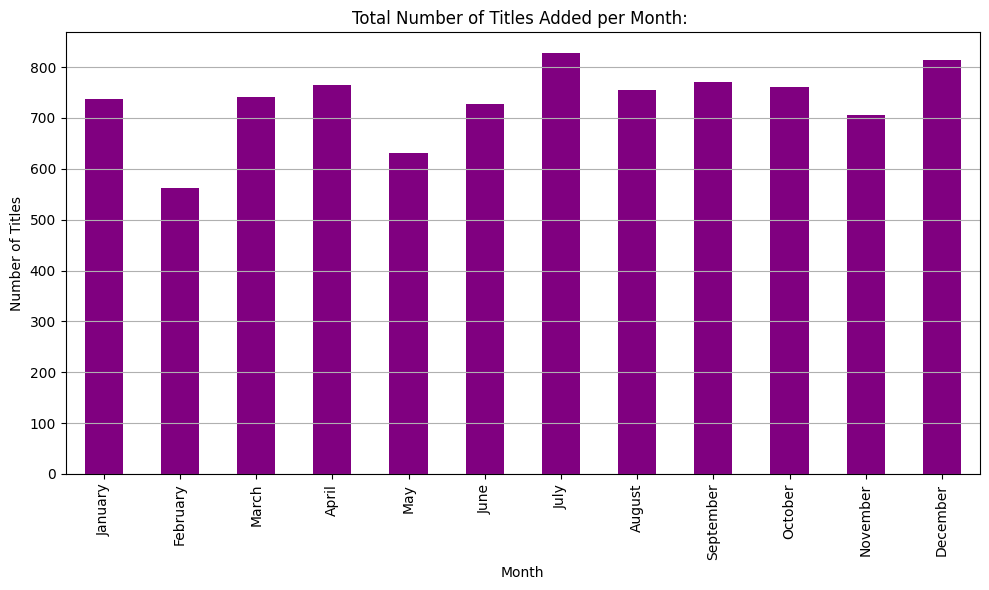

In [181]:
month_counts = df['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])


plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='purple')
plt.title("Total Number of Titles Added per Month: ")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### #B

In [182]:
duplicate_titles = df[df.duplicated('title', keep=False)]
print(duplicate_titles.head())

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, year_added, month_added]
Index: []


In [183]:

duplicates_grouped = duplicate_titles.groupby('title').agg({
    'country': lambda x: list(set(x.dropna())),
    'rating': lambda x:  list(set(x.dropna()))
}).reset_index()
print(duplicates_grouped)

Empty DataFrame
Columns: [title, country, rating]
Index: []


### #C

In [184]:
genres = df['listed_in'].dropna().str.split(',').explode().str.strip()

genre_counts = genres.value_counts()

print(genre_counts.head(10))

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


### #D

In [185]:
df['date_added'] = pd.to_datetime(df['date_added'])
filtered = df[(df['type'] == 'TV Shows') &
              (df['date_added'].dt.year >= 2019) &
              (df['rating'] == 'TV-MA')&
              (df['country'].str.contains('United States')) &
              (df['listed_in'].str.contains('International TV Shows'))]


In [186]:
result = filtered[['title', 'country', 'rating', 'date_added', 'listed_in']]

In [187]:
print(result.head(10))

Empty DataFrame
Columns: [title, country, rating, date_added, listed_in]
Index: []
